In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('bank_marketing_dataset.csv')

In [57]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [58]:
df=df[['age','job','balance','loan','contact']]
df.isnull().sum()

age        0
job        0
balance    0
loan       0
contact    0
dtype: int64

In [59]:
df.head()

,age,job,balance,loan,contact
0,59,admin.,2343,no,unknown
1,56,admin.,45,no,unknown
2,41,technician,1270,no,unknown
3,55,services,2476,no,unknown
4,54,admin.,184,no,unknown


In [60]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
df['job']=le.fit_transform(df['job'])
df['loan']=le.fit_transform(df['loan'])

In [61]:
df['contact']=le.fit_transform(df['contact'])
df.head()

,age,job,balance,loan,contact
0,59,0,2343,0,2
1,56,0,45,0,2
2,41,9,1270,0,2
3,55,7,2476,0,2
4,54,0,184,0,2


In [62]:
x=df.drop('loan',axis=1)
y=df['loan']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='balance'>

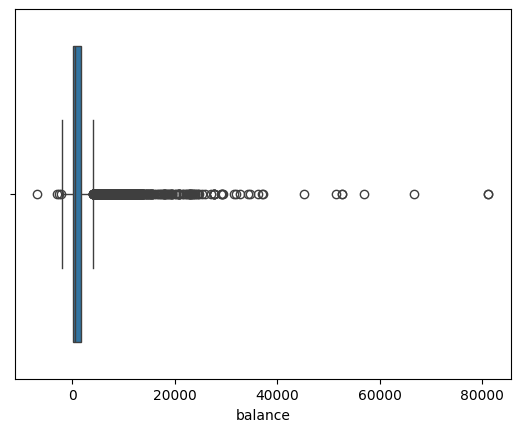

In [63]:
sns.boxplot(data=df,x='balance')

<Axes: xlabel='balance'>

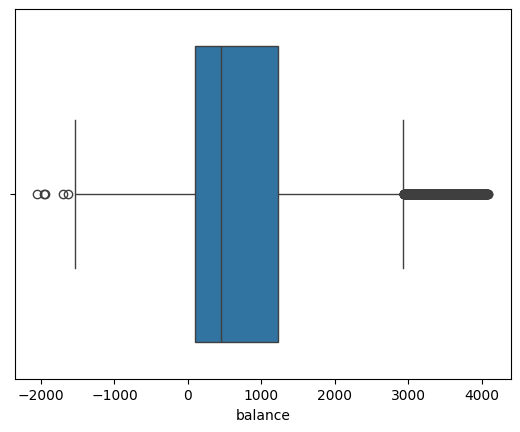

In [64]:
q1=df['balance'].quantile(0.25)
q3=df['balance'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['balance']>=lb) & (df['balance']<=ub)]
sns.boxplot(data=df,x='balance')

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=4)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
classifier.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(f"Accuracy Score:{accuracy_score(y_test,y_pred)*100}%")

Accuracy Score:87.56718022214261%


In [69]:
confusion_matrix(y_test,y_pred)

array([[2437,   13],
       [ 334,    7]])

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2450
           1       0.35      0.02      0.04       341

    accuracy                           0.88      2791
   macro avg       0.61      0.51      0.49      2791
weighted avg       0.81      0.88      0.82      2791



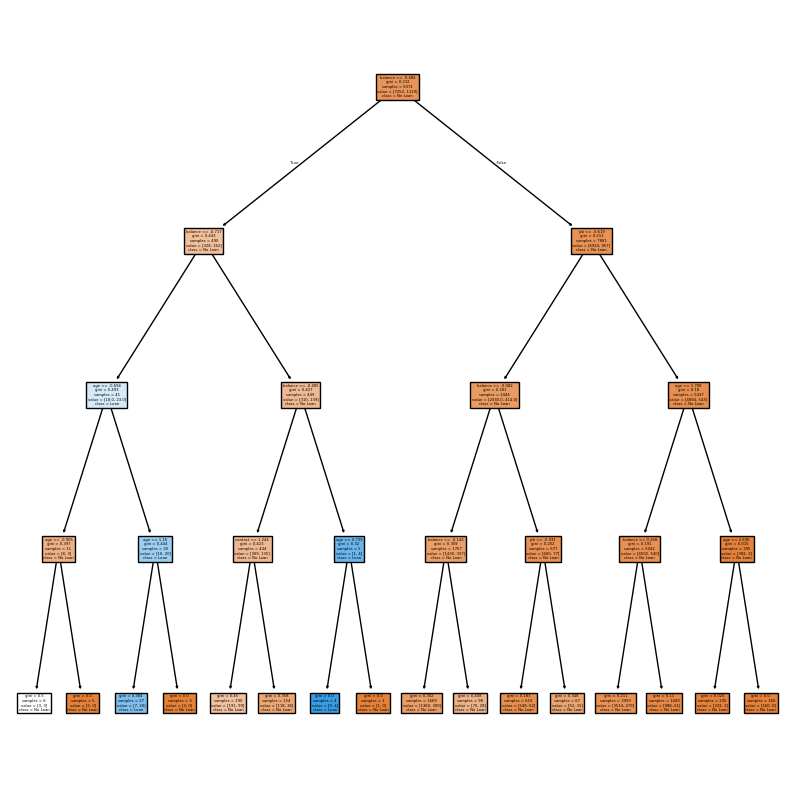

In [75]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plot_tree(classifier,filled=True,class_names=['No Loan','Loan'],feature_names=x.columns)
plt.show()